# Downloading places of interest (POI) Data from OSM

Useful open street maps overpass API wrappers to download buildings and streets.

## Download Data by Bounding Box

Downloaded 37962 buildings, 7747 streets
Building categories: {'residential': 36042, 'other': 1004, 'retail': 569, 'workplace': 246, 'park': 101}

Sample buildings data:
     osm_type      subtype subtype_2 subtype_3 garden_city_category  \
0         yes  residential      <NA>       NaN          residential   
1    hospital      medical      <NA>       NaN            workplace   
2         yes  residential      <NA>       NaN          residential   
3  university    education      <NA>       NaN            workplace   
4         yes  residential      <NA>       NaN          residential   

      category           addr:street     addr:city addr:state  \
0  residential                   NaN           NaN        NaN   
1    workplace                   NaN           NaN        NaN   
2  residential  Spring Garden Street  Philadelphia        NaN   
3    workplace                   NaN  Philadelphia        NaN   
4  residential         Walnut Street  Philadelphia         PA   

  addr:house

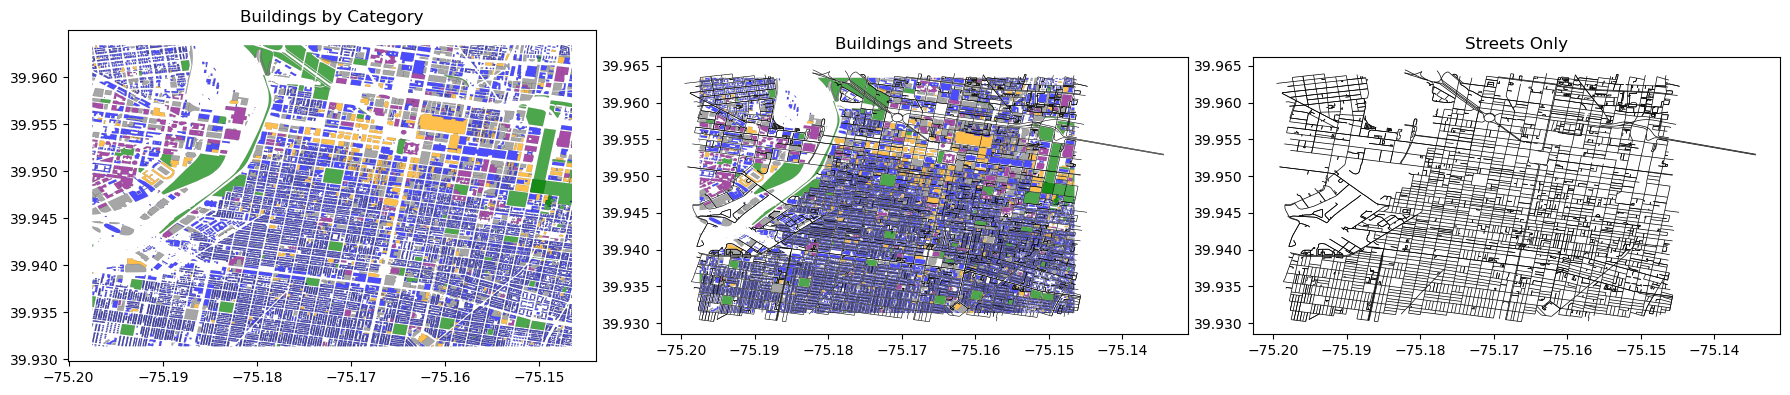

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from nomad.map_utils import download_osm_buildings, download_osm_streets, remove_overlaps

# Download by Bounding Box
bbox = (-75.19747721789525, 39.931392279878246, -75.14652246706544, 39.96336810441389)

# Download, process, and save
buildings = download_osm_buildings(bbox, schema='garden_city', clip=True, explode=True, infer_building_types=True)
streets = download_osm_streets(bbox, clip=True, explode=True)

buildings = remove_overlaps(buildings)

buildings.to_file("philadelphia_buildings.geojson", driver="GeoJSON")
streets.to_file("philadelphia_streets.geojson", driver="GeoJSON")

print(f"Downloaded {len(buildings)} buildings, {len(streets)} streets")
print(f"Building categories: {buildings['garden_city_category'].value_counts().to_dict()}")

# Show sample of downloaded data
print("\nSample buildings data:")
print(buildings.head())

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = {
    'park': 'green',
    'residential': 'blue', 
    'retail': 'orange',
    'workplace': 'purple',
    'other': 'grey'
}

# Buildings by category with proper colors
for category, color in colors.items():
    subset = buildings[buildings['garden_city_category'] == category]
    if len(subset) > 0:
        subset.plot(ax=axes[0], color=color, edgecolor='black', linewidth=0.1, alpha=0.7)
axes[0].set_title('Buildings by Category')
axes[0].set_aspect('equal')

# Buildings + Streets
for category, color in colors.items():
    subset = buildings[buildings['garden_city_category'] == category]
    if len(subset) > 0:
        subset.plot(ax=axes[1], color=color, edgecolor='black', linewidth=0.08, alpha=0.7)
streets.plot(ax=axes[1], color='black', linewidth=0.4)
axes[1].set_title('Buildings and Streets')
axes[1].set_aspect('equal')

# Streets only
streets.plot(ax=axes[2], color='black', linewidth=0.5)
axes[2].set_title('Streets Only')
axes[2].set_aspect('equal')

plt.tight_layout()
plt.show(block=False)

## Download Data by City Name

Downloaded 7932 buildings, 23172 streets
Building categories: {'residential': 5574, 'other': 2035, 'workplace': 155, 'retail': 154, 'park': 14}

Sample Salem buildings data:
     osm_type      subtype subtype_2 subtype_3 garden_city_category  \
0         yes  residential      <NA>       NaN          residential   
1         yes  residential      <NA>       NaN          residential   
3  apartments  residential      <NA>       NaN          residential   
5  apartments  residential      <NA>       NaN          residential   
7         yes   commercial      <NA>       NaN               retail   

      category    addr:street   addr:city addr:state addr:housenumber  \
0  residential            NaN         NaN         NJ              NaN   
1  residential            NaN         NaN         NJ              NaN   
3  residential  Bailey Street  Pilesgrove        NaN               10   
5  residential   Alloway Road   Woodstown        NaN               21   
7       retail            NaN     

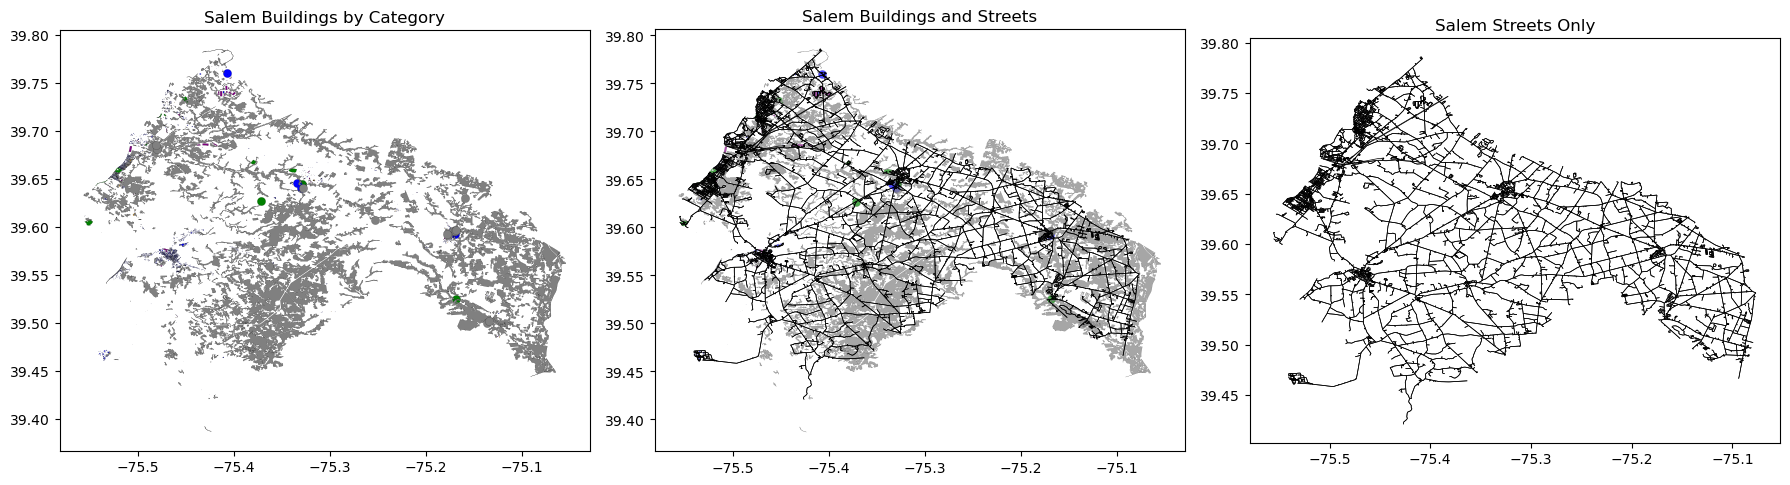

In [ ]:
city_name = 'Salem, New Jersey'

salem_buildings = download_osm_buildings(city_name, schema='garden_city', explode=True, infer_building_types=True)
salem_streets = download_osm_streets(city_name, explode=True)

# Remove overlaps
salem_buildings = remove_overlaps(salem_buildings)

# Save data
salem_buildings.to_file("salem_buildings.geojson", driver="GeoJSON")
salem_streets.to_file("salem_streets.geojson", driver="GeoJSON")

print(f"Downloaded {len(salem_buildings)} buildings, {len(salem_streets)} streets")
print(f"Building categories: {salem_buildings['garden_city_category'].value_counts().to_dict()}")

# Show sample of downloaded data
print("\nSample Salem buildings data:")
print(salem_buildings.head())

print("\nSample Salem streets data:")
print(salem_streets.head())

# Plot Salem results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = {
    'park': 'green',
    'residential': 'blue', 
    'retail': 'orange',
    'workplace': 'purple',
    'other': 'grey'
}

# Buildings by category
for category, color in colors.items():
    subset = salem_buildings[salem_buildings['garden_city_category'] == category]
    if len(subset) > 0:
        subset.plot(ax=axes[0], color=color, edgecolor='black', linewidth=0.1)
axes[0].set_title('Salem Buildings by Category')
axes[0].set_aspect('equal')

# Buildings + Streets
for category, color in colors.items():
    subset = salem_buildings[salem_buildings['garden_city_category'] == category]
    if len(subset) > 0:
        subset.plot(ax=axes[1], color=color, edgecolor='black', linewidth=0.08, alpha=0.7)
salem_streets.plot(ax=axes[1], color='black', linewidth=0.5)
axes[1].set_title('Salem Buildings and Streets')
axes[1].set_aspect('equal')

# Streets only
salem_streets.plot(ax=axes[2], color='black', linewidth=0.5)
axes[2].set_title('Salem Streets Only')
axes[2].set_aspect('equal')

plt.tight_layout()
plt.show(block=False)